In [5]:
import cv2
import numpy as np
from PIL import Image

In [6]:
raw_img = Image.open("/home/maslab/opencv/old_scripts/red_image.png")

In [7]:
raw_img.size

(640, 480)

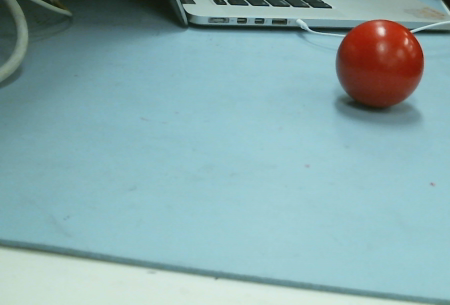

In [33]:
np.array(raw_img).shape
Image.fromarray(raw_img)

In [9]:
raw_img = np.array(raw_img)[175:,:450]

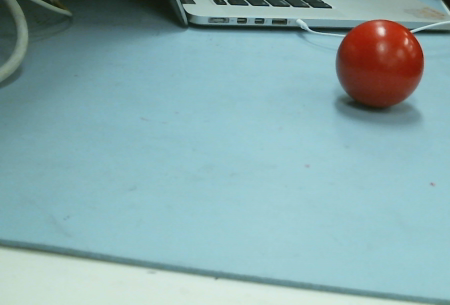

In [43]:
Image.fromarray(raw_img)

In [44]:
im = cv2.imread("/home/maslab/opencv/old_scripts/red_image.png")

In [45]:
np.array(im).shape

(480, 640, 3)

In [17]:
np.array(Image.fromarray(im)).shape

(480, 640, 3)

In [18]:
img = raw_img.astype(np.float32).copy()

In [19]:
mask = (img[:,:,0] > 1.3*img[:,:,1]) & (img[:,:,0] > 1.3*img[:,:,2])

In [20]:
img[:,:,1] = 0
img[:,:,2] = 0
np.place(img[:,:,0], mask, 255)
np.place(img[:,:,0], 1-mask, 0)

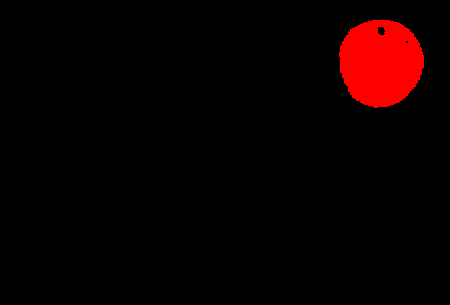

In [21]:
Image.fromarray(img.astype(np.uint8))

In [22]:
new_im =  ((1-mask)*255).astype(np.uint8)

In [23]:
u = np.sum(mask * np.arange(mask.shape[1])) / float(np.sum(mask))

In [24]:
u / mask.shape[1]

0.8451487049517117

In [25]:
np.arange(mask.shape[1])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [26]:
#################################################################################################
# Set up the detector with custom parameters.
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
#params.minThreshold = 10
#params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 0.1
params.maxArea = 1000

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.5
params.maxCircularity = 1

# Filter by Convexity
#params.filterByConvexity = True
#params.minConvexity = 0.87

# Filter by Inertia
#params.filterByInertia = True
#params.minInertiaRatio = 0.01
params.filterByColor = True
params.blobColor = 255
# Create a detector with the parameters
#detector = cv2.SimpleBlobDetector(params)
detector = cv2.SimpleBlobDetector()


In [27]:
blank = Image.new(color=(255), mode="L", size=(new_im.shape[1]*3, new_im.shape[0]*3))

In [28]:
blank.paste(im=Image.fromarray(new_im), box=(new_im.shape[0], 
                                             new_im.shape[1]))

In [29]:
new_im = np.array(blank.resize((256, 256)))

number of detected blobs  1


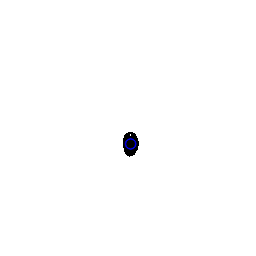

In [30]:
#################################################################################################
# Detect blobs.
keypoints = detector.detect(new_im)
print "number of detected blobs ", len(keypoints)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(new_im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show keypoints
# cv2.imshow("Keypoints", im_with_keypoints)
Image.fromarray(im_with_keypoints)

In [31]:
new_im.shape

(256, 256)